In [127]:
import os,csv,json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import seaborn as sns
colorpalette = ['#65BADA','#87D0E2','#068E8C','#75B3A7','#00A757','#82BA4F','#E5BA52','#F3EA1F','#D86F27','#E89E23','#C82E6B','#D4668F','#991B37','#C30021','#364285','#5D5296','#7D5495']

In [128]:
# import csv
csv_file_name = "/Users/emilydennis/Desktop/lightsheet/humanvselastix.csv"

In [129]:
fulldf = pd.read_csv(csv_file_name)
fulldf.keys()

Index(['volume', 'point', 'annotator', 'z', 'x', 'y', 'brainid'], dtype='object')

In [130]:
fulldf_nocomp = fulldf[fulldf.annotator != 'computer']
fulldf_comp = fulldf[fulldf.annotator == 'computer']

In [131]:
alldata = { } 

for name in np.unique(fulldf_nocomp.annotator):
    alldata[name] = {}
    annotator = fulldf[fulldf.annotator==name]
    for volume in ["A","B","C","D","E","F","G","H"]:
        annotatorvol = annotator[annotator.volume==volume]
        alldata[name][volume]= {}
        for point in range(1,5):
            annotatorpt = annotatorvol[annotatorvol.point==point]
            alldata[name][volume][point] = [annotatorpt.x.tolist(),annotatorpt.y.tolist(),annotatorpt.z.tolist()]



In [132]:
# now that our data is easier to index, want to make different values for plotting
toplot = { } 

for name in np.unique(fulldf_nocomp.annotator):
    toplot[name] = {}
    #want C vs G
    toplot[name]['humanvar'] = {}
    for point in range(1,5):
        vals=(abs(np.subtract(alldata[name]['C'][point],alldata[name]['G'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['humanvar'][point] = val.item()
    toplot[name]['before'] = {}
    for point in range(1,5):
        vals=(abs(np.subtract(alldata[name]['B'][point],alldata[name]['F'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['before'][point] = val.item()
    toplot[name]['affine'] = {}
    for point in range(1,5):
        vals=(abs(np.subtract(alldata[name]['D'][point],alldata[name]['F'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['affine'][point] = val.item()
    toplot[name]['a1b'] = {}
    for point in range(1,5):
        vals=(abs(np.subtract(alldata[name]['E'][point],alldata[name]['F'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['a1b'][point] = val.item()
    toplot[name]['final320'] = {}
    for point in range(1,5):
        vals=(abs(np.subtract(alldata[name]['C'][point],alldata[name]['F'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['final320'][point] = val.item()
    toplot[name]['final315'] = {}
    for point in range(1,5):
        vals=(abs(np.subtract(alldata[name]['A'][point],alldata[name]['F'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['final315'][point] = val.item()
    toplot[name]['final315v320'] = {}
    for point in range(1,5):
        vals=(abs(np.subtract(alldata[name]['A'][point],alldata[name]['C'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['final315v320'][point] = val.item()        

In [133]:
# calculate for each annotator, each point
forplots = ['humanvar','before','affine','a1b','final320','final315','final315v320']
anns = np.unique(fulldf_nocomp.annotator)
points = [1,2,3,4]
# want for each comparison, a value for each annotator and each point
# columns = comparison, annotator, point
# data = [{'comparison':'humanvar','annotator':'name','point':1,'value':}]


In [134]:
collapsedpts=[]
for comparison in forplots:
    for name in anns:
        collapsedpts.append([comparison,name,np.mean([*toplot[name][comparison].values()])])
            
pts=[]
for comparison in forplots:
    for name in anns:
        for point in points:
            pts.append([comparison,name,point,toplot[name][comparison][point]])

In [135]:
pts_df = pd.DataFrame(pts,columns=['comparison','name','pts','value'])
collapsed_pts_df = pd.DataFrame(collapsedpts,columns=['comparison','name','value'])

In [136]:
pts_no_before = collapsed_pts_df[collapsed_pts_df.comparison!='before']
pts_k320_one = pts_no_before[pts_no_before.comparison!='final315']
pts_k320 = pts_k320_one[pts_k320_one.comparison!='final315v320']
pts_k320

,comparison,name,value
0,humanvar,Adrian,2.25
1,humanvar,Chuck,1.25
2,humanvar,Emily,3.75
3,humanvar,Jess,27.50
4,humanvar,Marino,3.25
5,humanvar,Peter,2.50
6,humanvar,Thomas,11.50
14,affine,Adrian,15.25
15,affine,Chuck,23.00
16,affine,Emily,14.25


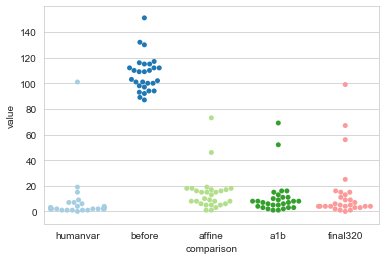

In [137]:
pts_df_sub = pts_df[pts_df.comparison!='final315']
pts_df_sub = pts_df_sub[pts_df_sub.comparison!='final315v320']

ax = sns.set_style('whitegrid')
ax=sns.set_palette("Paired")
ax= sns.swarmplot(x='comparison',y='value',data=pts_df_sub)


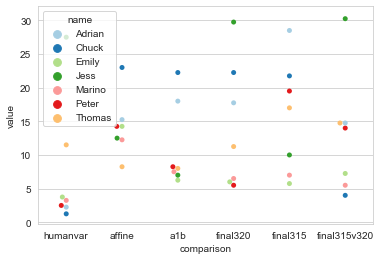

In [138]:
ax=sns.set_palette("Paired")
ax = sns.set_style('whitegrid')
ax= sns.swarmplot(x='comparison',y='value',data=collapsed_pts_df[collapsed_pts_df.comparison!='before'],hue='name')

In [139]:
pts_df_sub['logval'] = np.log10(pts_df_sub['value'])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


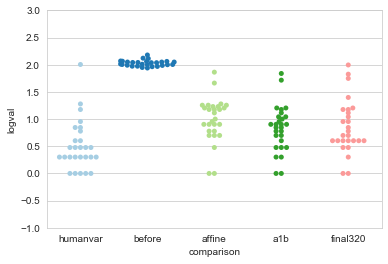

In [140]:
ax = sns.set_style('whitegrid')
ax=sns.set_palette("Paired")
ax= sns.swarmplot(x='comparison',y='logval',data=pts_df_sub)
ax = plt.ylim(-1,3)

plt.savefig('/Users/emilydennis/Desktop/humanvselastix_withJ.eps')

In [69]:
import scipy.stats as stats

In [70]:
pts_df_sub

,comparison,name,pts,value,logval
0,humanvar,Adrian,1,2,0.693147
1,humanvar,Adrian,2,2,0.693147
2,humanvar,Adrian,3,2,0.693147
3,humanvar,Adrian,4,3,1.098612
4,humanvar,Chuck,1,1,0.000000
...,...,...,...,...,...
115,final320,Peter,4,4,1.386294
116,final320,Thomas,1,4,1.386294
117,final320,Thomas,2,11,2.397895
118,final320,Thomas,3,5,1.609438


In [74]:
stats.f_oneway(pts_df_sub['value'][pts_df_sub['comparison']=='humanvar'],
              pts_df_sub['value'][pts_df_sub['comparison']=='before'],
              pts_df_sub['value'][pts_df_sub['comparison']=='affine'],
              pts_df_sub['value'][pts_df_sub['comparison']=='a1b'],
              pts_df_sub['value'][pts_df_sub['comparison']=='final320'])

F_onewayResult(statistic=226.35125373630106, pvalue=1.5917333429803256e-53)

In [80]:
hv = pts_df_sub[pts_df_sub['comparison']=='humanvar']
b = pts_df_sub[pts_df_sub['comparison']=='before']
a1b=pts_df_sub[pts_df_sub['comparison']=='a1b']
f320 = pts_df_sub[pts_df_sub['comparison']=='final320']
a = pts_df_sub[pts_df_sub['comparison']=='affine']

In [94]:
stats.ttest_ind(hv['value'],b['value'])

Ttest_indResult(statistic=-32.47754432340425, pvalue=2.2977125180656378e-33)

In [95]:
stats.ttest_ind(hv['value'],a['value'])

Ttest_indResult(statistic=-3.1648483280374915, pvalue=0.0027509699841684033)

In [96]:
stats.ttest_ind(hv['value'],a1b['value'])

Ttest_indResult(statistic=-2.275023131640141, pvalue=0.02761155804152916)

In [97]:
stats.ttest_ind(hv['value'],f320['value'])

Ttest_indResult(statistic=-2.136045592152692, pvalue=0.03802990243420504)

In [101]:
stats.ttest_ind(hv['value'],f320['value'])

Ttest_indResult(statistic=-2.136045592152692, pvalue=0.03802990243420504)

In [112]:
stats.ttest_ind(f320['value'],a['value'])

Ttest_indResult(statistic=-0.6492457427696064, pvalue=0.5194082811654291)

In [113]:
stats.ttest_ind(f320['value'],a1b['value'])

Ttest_indResult(statistic=-0.03580736544908879, pvalue=0.9715908980672572)

In [114]:
stats.ttest_ind(a1b['value'],a['value'])

Ttest_indResult(statistic=-0.6274187372226518, pvalue=0.5334869999093308)